In [231]:
# Manejo de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesamiento
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Modelos
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Clasificador de correos: Spam vs No Spam

# Objetivo: Crear un modelo que clasifique mensajes como spam o no spam usando Machine Learning clásico.

# Pasos a seguir:
# 1. Cargar datos
# 2. Explorar y preprocesar
# 3. Dividir datos en train/test
# 4. Entrenar modelos
# 5. Evaluar desempeño
# 6. Realizar predicciones



In [232]:
# Cargar dataset
df_ingles = pd.read_csv('spam.csv', encoding='latin-1')[['v1','v2']]  # Seleccionamos las columnas relevantes/necesarios
# Cambiamos la columna v1 y v2 por label y text
df_ingles.columns = ['label','text']

df_espanol = pd.read_csv('spam_espanol.csv')
df = pd.concat([df_ingles, df_espanol], ignore_index=True)

print(df['label'].value_counts())
# Revisar los primeros registros
df.head()


label
ham     4825
spam     770
Name: count, dtype: int64


,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Número de registros: 5595


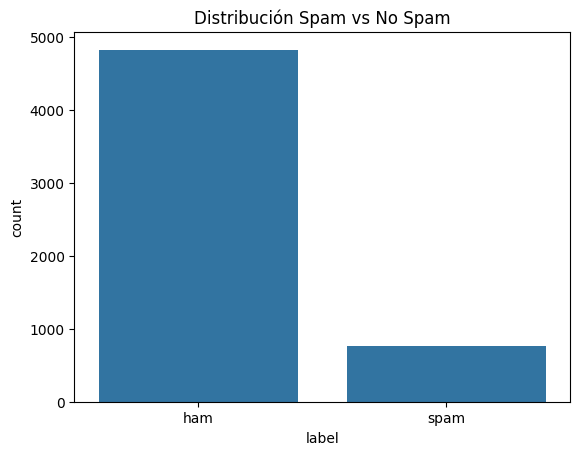

label    0
text     0
dtype: int64


In [233]:
#Explorar
# Tamaño del dataset
print("Número de registros:", len(df))

# Distribución de clases
sns.countplot(x='label', data=df)
plt.title('Distribución Spam vs No Spam')
plt.show()
# Verificar valores nulos
print(df.isnull().sum())


In [234]:
# preprocesar

# Rellenar textos vacíos
df['text'] = df['text'].fillna("")
# Eliminar filas sin etiqueta
df = df.dropna(subset=['label'])

# Convertir etiquetas a valores numéricos, cambiar ham por 0 y spam por 1
df['label'] = df['label'].map({'ham':0, 'spam':1})

# Vectorización del texto con TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,2))

# texto
X = vectorizer.fit_transform(df['text'])
# 0 y 1
y = df['label']


In [235]:
# Dividir datos en train/test
# y etiquetas x caracteristicas
X_train, X_test, y_train, y_test = train_test_split(
    # 20% de los datos se reservará para pruebas, y el 80% restante se usará para entrenamiento.
    X, y, test_size=0.2, random_state=42 
    
)

print("Datos de entrenamiento:", X_train.shape[0]) #entrenamiento
print("Datos de prueba:", X_test.shape[0]) #prueba


Datos de entrenamiento: 4476
Datos de prueba: 1119


In [236]:
# Entrenar modelos
# instancia del clasificador Naive Bayes multinomial.
nb_model = MultinomialNB(alpha=0.5)
# entrenamos al modelo, X_train son los vesctores numericos (mensajes) y y_train las etiquetas (0 = ham, 1 = spam).
nb_model.fit(X_train, y_train)


,alpha,0.5
,force_alpha,True
,fit_prior,True
,class_prior,None


=== Naive Bayes ===
Accuracy: 0.9758713136729222
Precision: 1.0
Recall: 0.8187919463087249
F1 Score: 0.9003690036900369


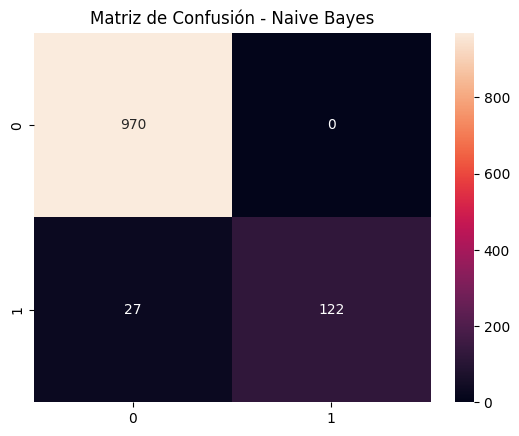

Ejemplos de falsos negativos (spam clasificado como no spam):
1. Goal! Arsenal 4 (Henry, 7 v Liverpool 2 Henry scores with a simple shot from 6 yards from a pass by Bergkamp to give Arsenal a 2 goal margin after 78 mins.
2. http//tms. widelive.com/index. wml?id=820554ad0a1705572711&first=trueï¿½ï¿½C C Ringtoneï¿½ï¿½
3. TheMob>Yo yo yo-Here comes a new selection of hot downloads for our members to get for FREE! Just click & open the next link sent to ur fone...
4. Get a brand new mobile phone by being an agent of The Mob! Plus loads more goodies! For more info just text MAT to 87021.
5. Ever thought about living a good life with a perfect partner? Just txt back NAME and AGE to join the mobile community. (100p/SMS)
6. Oh my god! I've found your number again! I'm so glad, text me back xafter this msgs cst std ntwk chg ï¿½1.50
7. You have 1 new message. Call 0207-083-6089
8. 2/2 146tf150p
9. Email AlertFrom: Jeri StewartSize: 2KBSubject: Low-cost prescripiton drvgsTo listen to email call 1

In [237]:
# Predicción
# nb_model se usa para predecir las etiquetas de los datos de prueba X_test
# y_pred_nb es un array con valores 0 (ham) o 1 (spam)
y_pred_nb = nb_model.predict(X_test)

# Métricas
print("=== Naive Bayes ===")
# Proporción de predicciones correctas sobre el total.
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
# De los que predijo como spam, ¿cuántos realmente lo eran?
print("Precision:", precision_score(y_test, y_pred_nb))
# De todos los spam reales, ¿cuántos detectó el modelo?
print("Recall:", recall_score(y_test, y_pred_nb))
# Media armónica entre Precisión y Recall. Útil si las clases están desbalanceadas.
print("F1 Score:", f1_score(y_test, y_pred_nb))

# Matriz de confusión
# La matriz de confusión muestra cómo se distribuyen las predicciones:
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d')
plt.title("Matriz de Confusión - Naive Bayes")
plt.show()

y_pred = nb_model.predict(X_test)
falsos_negativos_idx = (y_test == 1) & (y_pred == 0)
mensajes_falsos_negativos = df.iloc[y_test.index[falsos_negativos_idx]]['text']
# Mostrar algunos ejemplos
print("Ejemplos de falsos negativos (spam clasificado como no spam):")
for i, msg in enumerate(mensajes_falsos_negativos.head(10)):
    print(f"{i+1}. {msg}")


In [238]:
nuevos_mensajes = [
    "Win a free iPhone today!",
    "Hi, I'll remind you about our meeting tomorrow at 10 a.m.",
    "Gana un iPhone gratis hoy!",
    "Hola, te recuerdo nuestra reunión mañana a las 10am"
]

# Transformar texto
nuevo_vector = vectorizer.transform(nuevos_mensajes)

# Predecir
predicciones = nb_model.predict(nuevo_vector)
for msg, pred in zip(nuevos_mensajes, predicciones):
    print(f"Mensaje: {msg} → {'Spam' if pred==1 else 'No Spam'}")


Mensaje: Win a free iPhone today! → Spam
Mensaje: Hi, I'll remind you about our meeting tomorrow at 10 a.m. → No Spam
Mensaje: Gana un iPhone gratis hoy! → Spam
Mensaje: Hola, te recuerdo nuestra reunión mañana a las 10am → No Spam
